# Exploratory Data Analysis

### Setup

In [1]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("../")

import config.environvars as environvars
import config.credentials as credentials
import data.extract
import data.transform

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(environvars.paths.path_swissdox+"swissdox.csv")

In [3]:
df["medium_name"].value_counts()

medium_name
cash.ch                      14110
fuw.ch                        5608
handelszeitung.ch             3851
tagblatt.ch                   3560
blick.ch                      3425
                             ...  
TV Land & Lüt                    2
glueckspost.ch                   1
züritipp (Tages-Anzeiger)        1
boleromagazin.ch                 1
SI Sport                         1
Name: count, Length: 119, dtype: int64

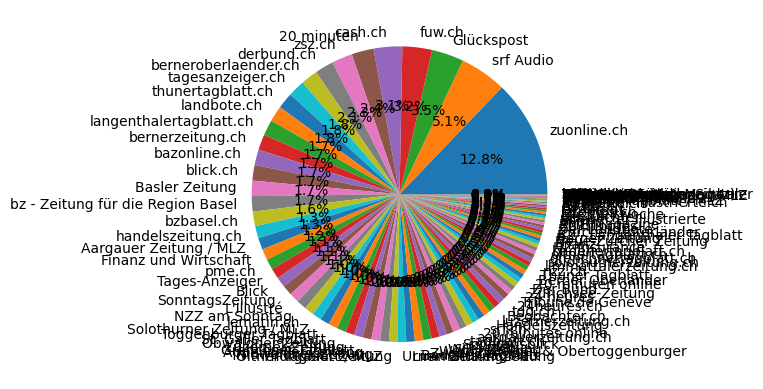

In [4]:
plt.pie(df['medium_name'].value_counts(), labels=df['medium_name'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [5]:
df["medium_name"].unique()

array(['zuonline.ch', 'srf Audio', 'Glückspost', 'fuw.ch', 'cash.ch',
       '20 minuten', 'zsz.ch', 'derbund.ch', 'berneroberlaender.ch',
       'tagesanzeiger.ch', 'thunertagblatt.ch', 'landbote.ch',
       'langenthalertagblatt.ch', 'bernerzeitung.ch', 'bazonline.ch',
       'blick.ch', 'Basler Zeitung', 'bz - Zeitung für die Region Basel',
       'bzbasel.ch', 'handelszeitung.ch', 'Aargauer Zeitung / MLZ',
       'Finanz und Wirtschaft', 'pme.ch', 'Tages-Anzeiger', 'Blick',
       'SonntagsZeitung', "L'Illustré", 'NZZ am Sonntag', 'lematin.ch',
       'Solothurner Zeitung / MLZ', 'Toggenburger Tagblatt',
       'St. Galler Tagblatt', 'Obwaldner Zeitung', 'Luzerner Zeitung',
       'Grenchner Tagblatt', 'Appenzeller Zeitung', 'Nidwaldner Zeitung',
       'Oltner Tagblatt / MLZ', 'Thurgauer Zeitung', 'Urner  Zeitung',
       'Limmattaler Zeitung', 'Badener Tagblatt', 'Zuger Zeitung',
       'Werdenberger & Obertoggenburger', 'Wiler Zeitung', 'srf Video',
       'Sonntagsblick', 'tagb

In [6]:
df["content"]

0         <tx><ld><p>Die Niederlassungen der Raiffeisenb...
1         <tx><ld><p>Adolphe Binder wird neue Ballett-Ch...
2         <tx><ld><p>Wer Missstände in der Basler Verwal...
3         <tx><p>Wenn es um den Handel mit Gold geht, li...
4         <tx><ld><p>Vorbörsen-News zu Nestlé, Phoenix M...
                                ...                        
109858    <tx><ld><p>Bei schönem Wetter bestimmen die St...
109859    <tx><ld><p>Die Ratingagentur Standard &amp; Po...
109860    <tx><ld><p>Die Glarnerinnen und Glarner wollen...
109861    <tx><ld><p>Nach der Spitze im Oktober werden H...
109862    <tx><p>Die Finanzierung von Wohnraum in der Sc...
Name: content, Length: 109863, dtype: object

In [7]:
df["text"] = df["content"].apply(data.transform.preprocess.remove_tags)
df["text"]

0                 Genossenschafter gesucht: Die Raiffeis...
1               00:00:00 SRF Audio.   00:00:06 Das ist d...
2               00:00:00 SRF Audio.   00:00:06 Das Regio...
3           Wenn es um den Handel mit Gold geht, liegt d...
4               Overnight  USA  Die New Yorker Börsen ha...
                                ...                        
109858          Traktandiert sind 17 Geschäfte, darunter...
109859       Die Ratingagentur hebt in dem Bericht die s...
109860       Die Regierung und das Parlament wollten den...
109861            Die Hypothekarzinsen sind gesunken – a...
109862      Die Finanzierung von Wohnraum in der Schweiz...
Name: text, Length: 109863, dtype: object

In [14]:
test = df["text"][0]
test

'        Genossenschafter gesucht: Die Raiffeisenbank am Zürcher Kreuzplatz.    Vor kurzem ist vielen Raiffeisen-Kundinnen und -Kunden Post ins Haus geflattert. «Werden Sie jetzt Bankbesitzerin oder Bankbesitzer – Raiffeisenbank Zürich bietet Ihnen die Möglichkeit dazu!» Auch in Basel können derzeit Genossenschafts\xadanteile gezeichnet werden.  Der Hintergrund: Die Raiffeisenbanken Bern, Thalwil, Winterthur, St. Gallen, Basel und Zürich waren Niederlassungen von Raiffeisen Schweiz und werden schrittweise in die Unabhängigkeit entlassen. Kundinnen und Kunden können sich daran beteiligen – und an den Generalversammlungen mitbestimmen. Dazu müssen sie Genossenschaftsanteile zeichnen.  «An Spitzentagen wurden über 400 Zeichnungen entgegen\xad\xadgenommen.»  Das Interesse daran ist in Zürich riesig. «An Spitzentagen wurden über 400 Zeichnungen entgegen\xadgenommen», sagt ein Raiffeisen-Sprecher. Mehrere Tausend Anteilscheine sind bereits gezeichnet. Die genaue Zahl legt die Bank nicht offe

In [15]:
test = data.transform.preprocess.tokenize(test)
test

['Genossenschafter',
 'gesucht',
 ':',
 'Die',
 'Raiffeisenbank',
 'am',
 'Zürcher',
 'Kreuzplatz',
 '.',
 'Vor',
 'kurzem',
 'ist',
 'vielen',
 'Raiffeisen-Kundinnen',
 'und',
 '-Kunden',
 'Post',
 'ins',
 'Haus',
 'geflattert',
 '.',
 '«',
 'Werden',
 'Sie',
 'jetzt',
 'Bankbesitzerin',
 'oder',
 'Bankbesitzer',
 '–',
 'Raiffeisenbank',
 'Zürich',
 'bietet',
 'Ihnen',
 'die',
 'Möglichkeit',
 'dazu',
 '!',
 '»',
 'Auch',
 'in',
 'Basel',
 'können',
 'derzeit',
 'Genossenschafts\xadanteile',
 'gezeichnet',
 'werden',
 '.',
 'Der',
 'Hintergrund',
 ':',
 'Die',
 'Raiffeisenbanken',
 'Bern',
 ',',
 'Thalwil',
 ',',
 'Winterthur',
 ',',
 'St.',
 'Gallen',
 ',',
 'Basel',
 'und',
 'Zürich',
 'waren',
 'Niederlassungen',
 'von',
 'Raiffeisen',
 'Schweiz',
 'und',
 'werden',
 'schrittweise',
 'in',
 'die',
 'Unabhängigkeit',
 'entlassen',
 '.',
 'Kundinnen',
 'und',
 'Kunden',
 'können',
 'sich',
 'daran',
 'beteiligen',
 '–',
 'und',
 'an',
 'den',
 'Generalversammlungen',
 'mitbestimmen',

In [16]:
test = data.transform.preprocess.remove_stopwords(test, "german")
test

I probably want to extend stop word list later on


['Genossenschafter',
 'gesucht',
 ':',
 'Raiffeisenbank',
 'Zürcher',
 'Kreuzplatz',
 '.',
 'kurzem',
 'vielen',
 'Raiffeisen-Kundinnen',
 '-Kunden',
 'Post',
 'Haus',
 'geflattert',
 '.',
 '«',
 'Bankbesitzerin',
 'Bankbesitzer',
 '–',
 'Raiffeisenbank',
 'Zürich',
 'bietet',
 'Möglichkeit',
 '!',
 '»',
 'Basel',
 'derzeit',
 'Genossenschafts\xadanteile',
 'gezeichnet',
 '.',
 'Hintergrund',
 ':',
 'Raiffeisenbanken',
 'Bern',
 ',',
 'Thalwil',
 ',',
 'Winterthur',
 ',',
 'St.',
 'Gallen',
 ',',
 'Basel',
 'Zürich',
 'Niederlassungen',
 'Raiffeisen',
 'Schweiz',
 'schrittweise',
 'Unabhängigkeit',
 'entlassen',
 '.',
 'Kundinnen',
 'Kunden',
 'daran',
 'beteiligen',
 '–',
 'Generalversammlungen',
 'mitbestimmen',
 '.',
 'müssen',
 'Genossenschaftsanteile',
 'zeichnen',
 '.',
 '«',
 'Spitzentagen',
 'wurden',
 '400',
 'Zeichnungen',
 'entgegen\xad\xadgenommen.',
 '»',
 'Interesse',
 'daran',
 'Zürich',
 'riesig',
 '.',
 '«',
 'Spitzentagen',
 'wurden',
 '400',
 'Zeichnungen',
 'entgege

In [17]:
test = data.transform.preprocess.remove_punctuation(test)
test

['Genossenschafter',
 'gesucht',
 'Raiffeisenbank',
 'Zürcher',
 'Kreuzplatz',
 'kurzem',
 'vielen',
 'Raiffeisen-Kundinnen',
 '-Kunden',
 'Post',
 'Haus',
 'geflattert',
 'Bankbesitzerin',
 'Bankbesitzer',
 'Raiffeisenbank',
 'Zürich',
 'bietet',
 'Möglichkeit',
 'Basel',
 'derzeit',
 'Genossenschafts\xadanteile',
 'gezeichnet',
 'Hintergrund',
 'Raiffeisenbanken',
 'Bern',
 'Thalwil',
 'Winterthur',
 'St.',
 'Gallen',
 'Basel',
 'Zürich',
 'Niederlassungen',
 'Raiffeisen',
 'Schweiz',
 'schrittweise',
 'Unabhängigkeit',
 'entlassen',
 'Kundinnen',
 'Kunden',
 'daran',
 'beteiligen',
 'Generalversammlungen',
 'mitbestimmen',
 'müssen',
 'Genossenschaftsanteile',
 'zeichnen',
 'Spitzentagen',
 'wurden',
 '400',
 'Zeichnungen',
 'entgegen\xad\xadgenommen.',
 'Interesse',
 'daran',
 'Zürich',
 'riesig',
 'Spitzentagen',
 'wurden',
 '400',
 'Zeichnungen',
 'entgegen\xadgenommen',
 'sagt',
 'Raiffeisen-Sprecher',
 'Mehrere',
 'Tausend',
 'Anteilscheine',
 'bereits',
 'gezeichnet',
 'genaue

In [18]:
test = data.transform.preprocess.lemmatize(test)
test

[('Genossenschafter', 'Genossenschafter', 'NN'),
 ('gesucht', 'suchen', 'VV(PP)'),
 ('Raiffeisenbank', 'Raiffeisenbank', 'NN'),
 ('Zürcher', 'zürcher', 'ADJ(A)'),
 ('Kreuzplatz', 'Kreuzplatz', 'NN'),
 ('kurzem', 'kurz', 'ADJ(A)'),
 ('vielen', 'viel', 'PIAT'),
 ('Raiffeisen-Kundinnen', 'Raiffeisen-kundinn', 'NN'),
 ('-Kunden', '-kund', 'ADJ(A)'),
 ('Post', 'Post', 'NN'),
 ('Haus', 'Haus', 'NN'),
 ('geflattert', 'flattern', 'VV(PP)'),
 ('Bankbesitzerin', 'Bankbesitzerin', 'NN'),
 ('Bankbesitzer', 'Bankbesitzer', 'NN'),
 ('Raiffeisenbank', 'Raiffeisenbank', 'NE'),
 ('Zürich', 'Zürich', 'NE'),
 ('bietet', 'bieten', 'VV(FIN)'),
 ('Möglichkeit', 'Möglichkeit', 'NN'),
 ('Basel', 'Basel', 'NE'),
 ('derzeit', 'derzeit', 'ADV'),
 ('Genossenschafts\xadanteile', 'Genossenschafts\xadanteil', 'NN'),
 ('gezeichnet', 'zeichnen', 'VV(PP)'),
 ('Hintergrund', 'Hintergrund', 'NN'),
 ('Raiffeisenbanken', 'Raiffeisenbank', 'NN'),
 ('Bern', 'Bern', 'NE'),
 ('Thalwil', 'Thalwil', 'NE'),
 ('Winterthur', 'Winte

In [26]:
test = [t for t in test if t[2] in ["NN", "NE"]]

import gensim
id2word = gensim.corpora.Dictionary(test)
id2word
id2word[[0][:1][0]]

'Genossenschafter'

In [27]:
corpus = []
for text in test:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

lda_model.top_topics(corpus)
lda_model.print_topics()

[(0,
  '0.237*"NN" + 0.097*"Anteilschein" + 0.052*"Raiffeisenbank" + 0.049*"Jahr" + 0.037*"Jahren" + 0.031*"Kapital" + 0.031*"Anteilscheine" + 0.016*"Raiffeisenbanken" + 0.013*"August" + 0.013*"Unabhängigkeit"'),
 (1,
  '0.125*"NN" + 0.109*"Zürich" + 0.101*"NE" + 0.076*"Basel" + 0.068*"Bank" + 0.035*"Interesse" + 0.018*"Teil" + 0.018*"Post" + 0.018*"Kundinnen" + 0.018*"Beteiligung"'),
 (2,
  '0.299*"NN" + 0.063*"Prozent" + 0.021*"Frage" + 0.017*"St." + 0.017*"Kantonalbank" + 0.017*"Dividendenrendite" + 0.017*"Geld" + 0.017*"Nachschusspflicht" + 0.017*"Schieflage" + 0.017*"Verzinsung"'),
 (3,
  '0.245*"NN" + 0.095*"Genossenschafter" + 0.092*"Zins" + 0.036*"Genossenschaft" + 0.033*"Mitgliedschaft" + 0.030*"Genossenschaften" + 0.027*"Hypothek" + 0.014*"Eile" + 0.014*"Eigenständigkeit" + 0.014*"Kreuzplatz"'),
 (4,
  '0.242*"NE" + 0.054*"Bern" + 0.054*"Gallen" + 0.054*"Winterthur" + 0.053*"Kantonalbank" + 0.036*"Thalwil" + 0.028*"Thurgauer" + 0.019*"Schweiz" + 0.019*"Pierin" + 0.019*"Raiffe